# A2.1 Regresión logística y validación cruzada
## Luis Enrique Garcia Gallegos
### **Matricula**: 649247
En esta actividad trabajarás con la misma base de datos que trabajaste en el proyecto del primer parcial. 
Desarrolla los siguientes puntos en una *Jupyter Notebook*, tratando, dentro de lo posible, que cada punto se trabaje en una celda distinta. Los comentarios en el código siempre son bienvenidos, de preferencia, aprovecha el *markdown* para generar cuadros de descripción que ayuden al lector a comprender el trabajo realizado. 
1. Importa los datos a tu ambiente de trabajo. Especifica qué variable utilizarás como variable de salida, debe tratarse de una variable binaria. Si no hay ninguna variable binaria de interés, binariza la variable de salida que utilizaste en el proyecto (si trataste de predecir el precio de las casas, genera una variable que indique si una casa cuesta más que cierto monto, o menos). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
BaseDeDatos=pd.read_csv('INE_SECCION_2020.csv')
datos=BaseDeDatos.drop(columns=['ID', 'DISTRITO', 'MUNICIPIO', 'SECCION', 'POBFEM', 'POBMAS', 'VPH_SINTIC', 'VPH_SINCIN', 'VPH_SINLTC', 'VPH_CVJ', 'VPH_SINRTV', 'VPH_SPMVPI', 'VPH_STVP', 'VPH_CEL', 'VPH_TELEF', 'VPH_INTER', 'VPH_PC', 'VPH_RADIO', 'VPH_TV', 'VPH_BICI', 'VPH_MOTO', 'VPH_AUTOM', 'VPH_HMICRO', 'VPH_LAVAD', 'VPH_REFRI', 'VPH_SNBIEN', 'VPH_NDACMM', 'VPH_DSADMA', 'VPH_NDEAED', 'VPH_C_SERV', 'VPH_NODREN', 'VPH_DRENAJ', 'VPH_LETR', 'VPH_EXCSA', 'VPH_CISTER', 'VPH_TINACO', 'VPH_AEASP', 'VPH_AGUAFV', 'VPH_AGUADV', 'VPH_S_ELEC', 'VPH_C_ELEC', 'VPH_3YMASC', 'VPH_2CUART', 'VPH_1CUART', 'VPH_2YMASD', 'VPH_1DOR', 'VPH_PISOTI', 'VPH_PISODT', 'PRO_OCUP_C', 'PROM_OCUP', 'OCUPVIVPAR', 'VIVPAR_UT', 'VIVPAR_DES', 'TVIVPARHAB', 'VIVPARH_CV', 'VIVPAR_HAB', 'TVIVPAR', 'TVIVHAB', 'VIVTOT', 'PHOGJEF_M', 'PHOGJEF_F', 'POBHOG', 'HOGJEF_M', 'HOGJEF_F', 'TOTHOG', 'P12YM_SEPA', 'P12YM_CASA', 'P12YM_SOLT', 'PAFIL_OTRA', 'PAFIL_IPRI', 'PDER_IMSSB', 'PDER_SEGP', 'PAFIL_PDOM', 'PDER_ISTEE', 'PDER_ISTE', 'PDER_SS', 'PDER_IMSS', 'PSINDER', 'PDESOCUP_M', 'PDESOCUP_F', 'PDESOCUP', 'POCUPADA_M', 'POCUPADA_F', 'POCUPADA', 'PE_INAC_M', 'PE_INAC_F', 'PE_INAC', 'PEA_M', 'PEA_F', 'PEA', 'GRAPROES_M', 'GRAPROES_F', 'GRAPROES', 'P18YM_PB_M', 'P18YM_PB_F', 'P15SEC_COM', 'P15SEC_COF', 'P15SEC_INM', 'P15SEC_INF', 'P15PRI_COM', 'P15PRI_COF', 'P15PRI_INM', 'P15PRI_INF', 'P15YM_SE_M', 'P15YM_SE_F', 'P15YM_AN_F', 'P15YM_AN_M', 'P8A14AN_M', 'P8A14AN_F', 'P18A24A_M', 'P18A24A_F', 'P15A17A_F', 'P15A17A_M', 'P12A14NOAM', 'P12A14NOAF', 'P6A11_NOAM', 'P6A11_NOAF', 'P3A5_NOA_M', 'P3A5_NOA_F', 'PSIND_LIM', 'PCLIM_PMEN', 'PCLIM_RE_C', 'PCLIM_MOT2', 'PCLIM_OAUD', 'PCLIM_HACO', 'PCLIM_VIS', 'PCLIM_CSB', 'PCON_LIMI', 'PCDISC_MEN', 'PCDISC_M_A', 'PCDISC_AUD', 'PCDISC_LEN', 'PCDISC_VIS', 'PCDISC_MOT', 'PCON_DISC', 'POB_AFRO_M', 'POB_AFRO_F', 'POB_AFRO', 'PHOG_IND', 'P5_HLI_HE', 'P5_HLI_NHE', 'P5_HLI', 'P3HLI_HE_M', 'P3HLI_HE_F', 'P3HLI_HE', 'P3HLINHE_M', 'P3HLINHE_F', 'P3HLINHE', 'P3YM_HLI_M', 'P3YM_HLI_F', 'P3YM_HLI', 'PRESOE15_M', 'PRESOE15', 'PRESOE15_F', 'PRES2015_M', 'PRES2015_F', 'PRES2015', 'PNACOE_M', 'PNACOE_F', 'PNACOE', 'PNACENT_M', 'PNACENT_F', 'PNACENT', 'PROM_HNV', 'POB_EDADNE', 'POB65_MAS', 'POB15_64', 'POB0_14', 'REL_H_M', 'P_60YMAS_M', 'P_60YMAS_F', 'P_60YMAS', 'P_15A49_F', 'P_18A24_M', 'P_18A24_F', 'P_18A24', 'P_15A17_M', 'P_15A17_F', 'P_15A17', 'P_12A14_M', 'P_12A14_F', 'P_12A14', 'P_8A14_M', 'P_8A14_F', 'P_8A14', 'P_6A11_M', 'P_6A11_F', 'P_6A11', 'P_3A5_M', 'P_3A5_F', 'P_3A5', 'P_18YMAS_M', 'P_18YMAS_F', 'P_18YMAS', 'P_15YMAS_M', 'P_15YMAS_F', 'P_15YMAS', 'P_12YMAS_M', 'P_12YMAS_F', 'P_12YMAS', 'P_5YMAS_M', 'P_5YMAS_F', 'P_5YMAS', 'P_3YMAS_M', 'P_3YMAS_F', 'P_3YMAS', 'P_0A17', 'P_0A2_M', 'P_0A2_F'])
for i in range(32, 1, -1):
    name='ENTIDAD'+str(i)
    datos[name]=datos['ENTIDAD']//i
    existe=datos[name]*i
    datos['ENTIDAD']=datos['ENTIDAD']-existe
datos['TIPO']=datos['TIPO']-2
datos=datos.drop('ENTIDAD', axis=1)
datos.head(5)

,TIPO,POBTOT,P_0A2,P3A5_NOA,P6A11_NOA,P12A14NOA,P15A17A,P18A24A,P8A14AN,P15YM_AN,...,ENTIDAD11,ENTIDAD10,ENTIDAD9,ENTIDAD8,ENTIDAD7,ENTIDAD6,ENTIDAD5,ENTIDAD4,ENTIDAD3,ENTIDAD2
0,0,2564,36,8,5,0,98,203,2,4,...,0,0,0,0,0,0,0,0,0,0
1,0,889,27,9,6,4,26,46,3,21,...,0,0,0,0,0,0,0,0,0,0
2,0,2003,56,10,5,9,72,170,1,9,...,0,0,0,0,0,0,0,0,0,0
3,0,1636,40,17,3,5,50,158,1,18,...,0,0,0,0,0,0,0,0,0,0
4,0,808,14,4,3,0,34,66,1,5,...,0,0,0,0,0,0,0,0,0,0


Como en el proyecto [P P1. Regresión](P_P1_Regresion.html) use datos del __[INEGI](https://www.inegi.org.mx/datosabiertos/)__, entonces se uso el mismo codigo para este trabajo, solamente que ahora nos enfocaremos en poder predecir el `TIPO` el cual es una variable categórica (**0. Urbana**, **1. Mixta** y **2. Rural**); igualmente se hará *dummy* a la variable `ENTIDAD`.La razón por la que decidí hacer un modelo que prediga **3 categorías** en lugar de **32 categorías**, fue porque es más factible a la hora de trabajar e interpretar, no obstante se puede predecir las **32 categorías** gracias a la cantidad de datos que tenemos, si tuviéramos menos datos unicamente obtendríamos un modelo sobre ajustado.

2. Separa los datos en entrenamiento y prueba, con una relación de $80/20$. Asegúrate de mantener un balance de clases (es decir, si en la base de datos hay $70\%$ de observaciones de clase 0 y $30\% $ de observaciones de clase 1, deberá mantenerse una proporción muy similar tanto en los datos de entrenamiento como en los de prueba), e imprime en consola las proporciones para los **3 grupos** (datos originales, datos de entrenamiento, datos de prueba).

In [2]:
random.seed(0)
caliz, prueba=train_test_split(datos, train_size=0.8)
nC=caliz.shape[0]
mC=caliz.shape[1]
nP=prueba.shape[0]
mP=prueba.shape[1]
print("Datos de entrenamiento: ", caliz.shape, "\tDatos de prueba: ",prueba.shape, "\n\tTotal de datos: ", (nC+nP))
XC=caliz.drop('TIPO', axis=1)
YC=caliz['TIPO']
XP=prueba.drop('TIPO', axis=1)
YP=prueba['TIPO']

Datos de entrenamiento:  (55044, 47) 	Datos de prueba:  (13762, 47) 
	Total de datos:  68806


Se uso una semilla (misma que la del proyecto) para mantener un punto de referencia en nuestra partición de datos. Un detalle importante a mencionar es que tanto en `TIPO` y `ENTIDAD` hay un desbalance en nuestros datos, esto es importante a mencionar porque puede ser que en la partición exista un sesgo que haga que el modelo desprecie ciertos datos.

3. Usando los datos de entrenamiento, mide la exactitud de un modelo de regresión logística usando alguna técnica de validación cruzada. Si tu base de datos era particularmente compleja, puedes trabajar con **5 características de interés**, en vez de con toda la base de datos, o de tener que realizar un proceso de selección de características. 

In [ ]:
modelo=LogisticRegression(solver='newton-cg', penalty='l2', max_iter=1000)
scores=cross_val_score(modelo, XC, YC, cv=5, scoring='accuracy')
print(f'Exactitud promedio: {100*scores.mean():.2f}%\tDesviación estándar: {scores.std():.4f}')

Este código fue proporcionado por ChatGPT, no obstante se realizaron cambios, como el escoger para metros del modelo. En `solver` es el algoritmo de optimización por lo que se uso **newton-cg** debido a que tenemos un gran números de datos y es muy estable; `penalty` se uso **l2** debido a que es *Ridge* (reduce coeficientes sin eliminarlos), ademas esto evita el sobre ajuste en nuestro modelo. El `cv` se decidió que fuera de **5** debido a la cantidad de datos, ademas de que es tiene buena precisión. Con esto vemos que tenemos un $83\%$ aproximadamente de exactitud mientras que nuestra desviación estándar es menor lo que indica una estabilidad en el modelo.

4. Entrena un modelo de regresión logística, similar al del punto anterior, pero utilizando todo el subconjunto de datos de entrenamiento. Usando dicho modelo, genera un vector de probabilidades para los datos de prueba. Genera una matriz de confusión y reporta la exactitud, sensibilidad y especificidad del modelo antes **3 diferentes umbrales** (0.5, uno mayor, y uno menor). 


Resultados para umbral = 0.25	Exactitud: 63.51%


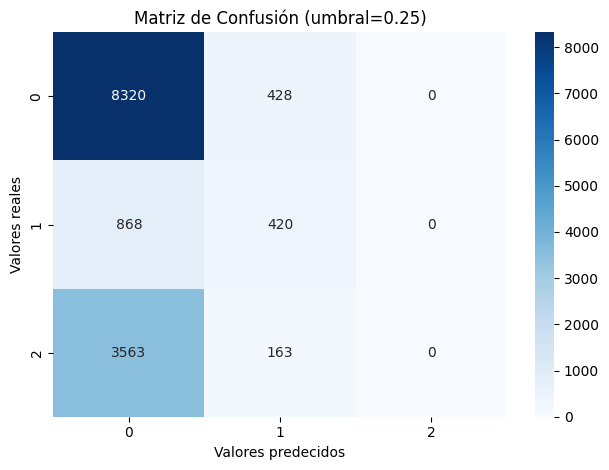


Resultados para umbral = 0.5	Exactitud: 63.76%


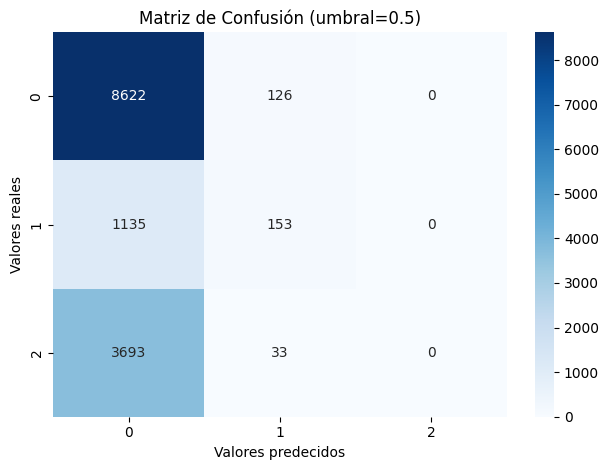


Resultados para umbral = 0.75	Exactitud: 63.73%


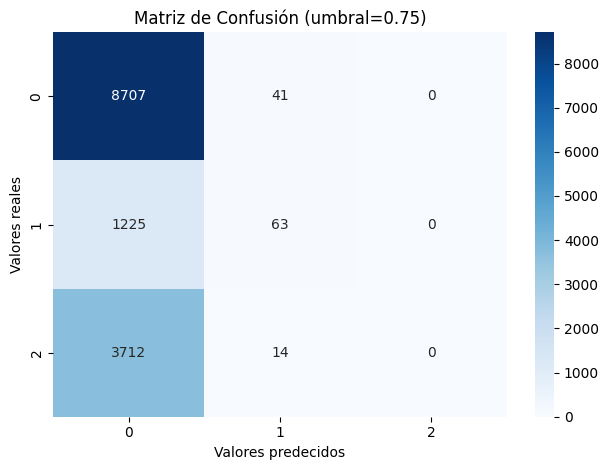

In [ ]:
modelo.fit(XC, YC)
y_prob=modelo.predict_proba(XP)
y_prob_pos=y_prob[:, 1]
umbrales=[0.25, 0.5, 0.75]
for umbral in umbrales:
    y_pred=(y_prob_pos>=umbral).astype(int)
    cm=confusion_matrix(YP, y_pred)
    exactitud=accuracy_score(YP, y_pred)
    print(f"\nResultados para umbral = {umbral}\tExactitud: {100*exactitud:.2f}%")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predecidos')
    plt.title(f'Matriz de Confusión (umbral={umbral})')
    plt.tight_layout()
    plt.show()

El código proviene de Claude.ai. Se decidió usar umbrales de $25\%$, $50\%$ y $75\%$, para ver como se comporta, sin embargo no se noto mucho cambio, ademas de que su exactitud no cambio mucho, esto se debe a lo que menciono antes (desbalance de los datos), por lo que el modelo directamente dice que todo es **0 Urbana**.

5. Grafica la curva ROC para las probabilidades calculadas en el punto previo y reporta el valor de la AUC.

ROC AUC promedio (macro): 0.8940


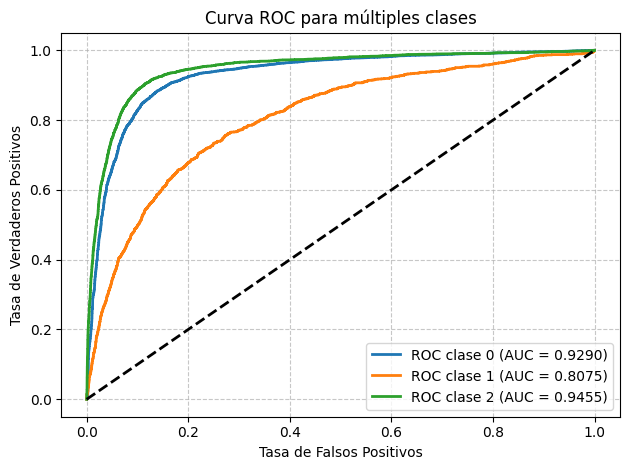

In [ ]:
clases=np.unique(YP)
n_clases=len(clases)
YP_binarizado=label_binarize(YP, classes=clases)
rocAuc=roc_auc_score(YP_binarizado, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC promedio (macro): {rocAuc:.4f}")
for i in range(n_clases):
    fpr, tpr, _=roc_curve(YP_binarizado[:, i], y_prob[:, i])
    roc_auc_i=auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC clase {clases[i]} (AUC = {roc_auc_i:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para múltiples clases')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El código proviene de Claude.ai. Si bien nuestros `AUC` son superiores a **0.8** lo que quire decir que tiene una buena clasificación (El `AUC` indica la capacidad del modelo para diferenciar entre clases. Un valor cercano a **1** significa un excelente desempeño, mientras que un valor de **0.5** indica un modelo aleatorio), no obstante en las matrices de confusion mostró que la **exactitud** era de $64\%$ aproximadamente, ya que tenemos un desbalance de los datos, por lo que es normal que nuestra **exactitud** sea diferente de nuestro `AUC`, igualmente se debe a los valores de nuestro umbral, porque solamente me enfoque en **3** en lugar de usar más o  valores más extremos.

6. Interpreta los resultados del modelo, describiendo cómo es que cada variable afecta a la salida, en términos de los coeficientes generados.

In [ ]:
odds_ratios=np.exp(modelo.coef_[0])
if hasattr(XC, 'columns'):
    coef_df=pd.DataFrame({'Variable': XC.columns, 'Coeficiente': modelo.coef_[0], 'Odds Ratio': odds_ratios}).sort_values('Odds Ratio', ascending=False)
    coef_df['Odds Ratio']=coef_df['Odds Ratio'].round(4)
    coef_df['Coeficiente']=coef_df['Coeficiente'].round(4)
    print(coef_df)
else:
    for i, (coef, odds_ratio) in enumerate(zip(modelo.coef_[0], odds_ratios)):
        print(f"Variable {i+1}: Coeficiente = {coef:.4f}, Odds Ratio = {odds_ratio:.4f}")
print("Término independiente (intercept):", modelo.intercept_)

     Variable  Coeficiente  Odds Ratio
38   ENTIDAD9       1.5076      4.5157
16  ENTIDAD31       0.4701      1.6002
24  ENTIDAD23       0.3529      1.4232
45   ENTIDAD2       0.2311      1.2600
28  ENTIDAD19       0.1746      1.1908
39   ENTIDAD8       0.0599      1.0617
12  P15SEC_IN       0.0109      1.0110
2    P3A5_NOA       0.0091      1.0092
4   P12A14NOA       0.0087      1.0087
6     P18A24A       0.0074      1.0074
14   P18YM_PB       0.0044      1.0044
7     P8A14AN       0.0034      1.0034
11  P15PRI_CO       0.0033      1.0033
9    P15YM_SE       0.0031      1.0031
13  P15SEC_CO       0.0001      1.0001
0      POBTOT      -0.0008      0.9992
8    P15YM_AN      -0.0028      0.9972
3   P6A11_NOA      -0.0049      0.9951
10  P15PRI_IN      -0.0067      0.9933
5     P15A17A      -0.0076      0.9924
1       P_0A2      -0.0095      0.9906
40   ENTIDAD7      -0.0096      0.9905
42   ENTIDAD5      -0.0101      0.9899
26  ENTIDAD21      -0.0793      0.9238
36  ENTIDAD11      -0.099

El código proviene de Claude.ai. Los odds ratios nos permiten conocer que tanto la variable influye en la probabilidad, por ejemplo si alguien pertenece a la `ENTIDAD9` multiplica por **4.5** la probabilidad del evento, mientras que otras variables ($Odds>1$) como `ENTIDAD19` su probabilidad aumenta un $19\%$ de pertenecer al evento, mientras que variables como `ENTIDAD18` ($Odds<1$) su probabilidad disminuye un $23\%$ aproximadamente de pertenecer al evento; entre más cerca el $Odds$ este de **1** esta variable tiene un leve impacto.

**Firma de Honor:** Doy mi palabra que he realizado esta actividad con integridad académica